In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import pylab 
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/mnt/d/final_project/data/train.csv', index_col='Id')
X = data.drop("Cover_Type", axis=1)
y = data["Cover_Type"]

In [3]:
X.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
Id,,,,,,,,,,,,,,,,,,,,,
1,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,0
2,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,0
3,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,0
4,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,0
5,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15120 entries, 1 to 15120
Data columns (total 54 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Elevation                           15120 non-null  int64
 1   Aspect                              15120 non-null  int64
 2   Slope                               15120 non-null  int64
 3   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 4   Vertical_Distance_To_Hydrology      15120 non-null  int64
 5   Horizontal_Distance_To_Roadways     15120 non-null  int64
 6   Hillshade_9am                       15120 non-null  int64
 7   Hillshade_Noon                      15120 non-null  int64
 8   Hillshade_3pm                       15120 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 10  Wilderness_Area1                    15120 non-null  int64
 11  Wilderness_Area2                    15120 non-null  int64
 12  Wild

In [5]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Elevation,15120.0,2749.322553,417.678187,1863.0,2376.0,2752.0,3104.00,3849.0
Aspect,15120.0,156.676653,110.085801,0.0,65.0,126.0,261.00,360.0
Slope,15120.0,16.501587,8.453927,0.0,10.0,15.0,22.00,52.0
Horizontal_Distance_To_Hydrology,15120.0,227.195701,210.075296,0.0,67.0,180.0,330.00,1343.0
Vertical_Distance_To_Hydrology,15120.0,51.076521,61.239406,-146.0,5.0,32.0,79.00,554.0
Horizontal_Distance_To_Roadways,15120.0,1714.023214,1325.066358,0.0,764.0,1316.0,2270.00,6890.0
Hillshade_9am,15120.0,212.704299,30.561287,0.0,196.0,220.0,235.00,254.0
Hillshade_Noon,15120.0,218.965608,22.801966,99.0,207.0,223.0,235.00,254.0
Hillshade_3pm,15120.0,135.091997,45.895189,0.0,106.0,138.0,167.00,248.0
Horizontal_Distance_To_Fire_Points,15120.0,1511.147288,1099.936493,0.0,730.0,1256.0,1988.25,6993.0


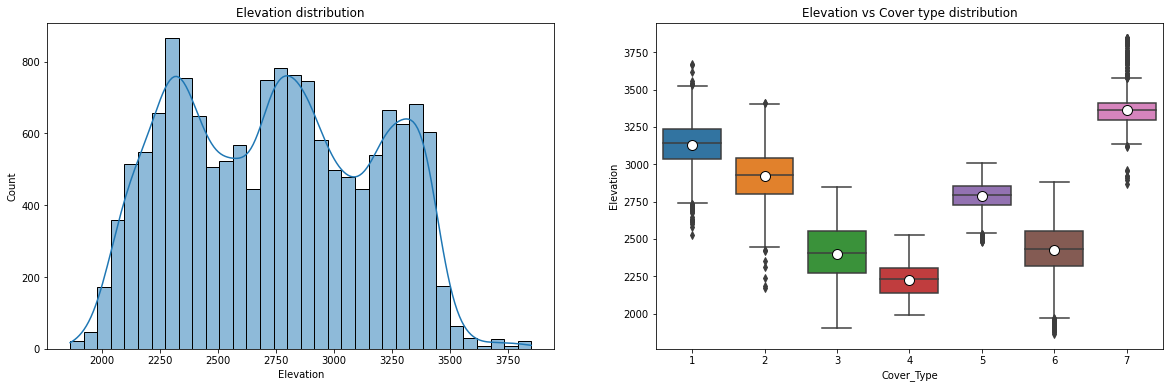

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
ax1.set_title("Elevation distribution")
sns.histplot(x=X['Elevation'], kde=True, ax=ax1)

ax2.set_title("Elevation vs Cover type distribution")
sns.boxplot(ax=ax2, x=y, y=X['Elevation'],showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.show()

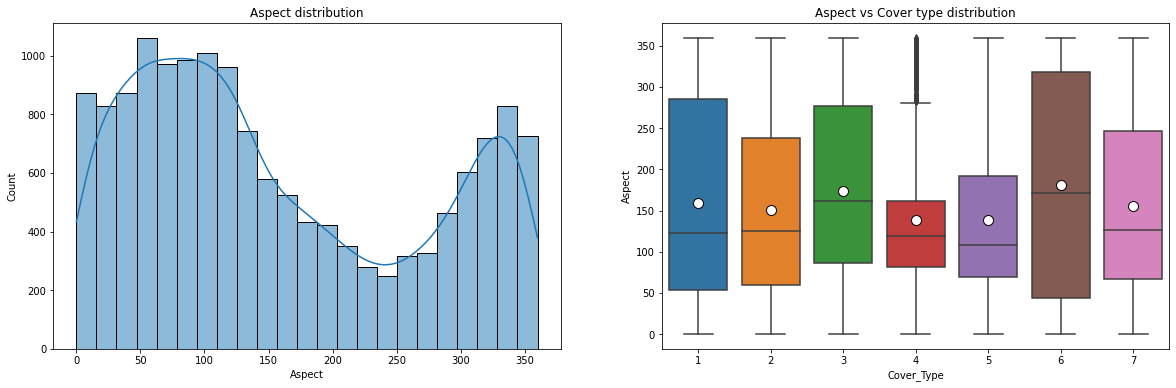

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
ax1.set_title("Aspect distribution")
sns.histplot(x=X['Aspect'], kde=True, ax=ax1)

ax2.set_title("Aspect vs Cover type distribution")
sns.boxplot(ax=ax2, x=y, y=X['Aspect'],showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.show()

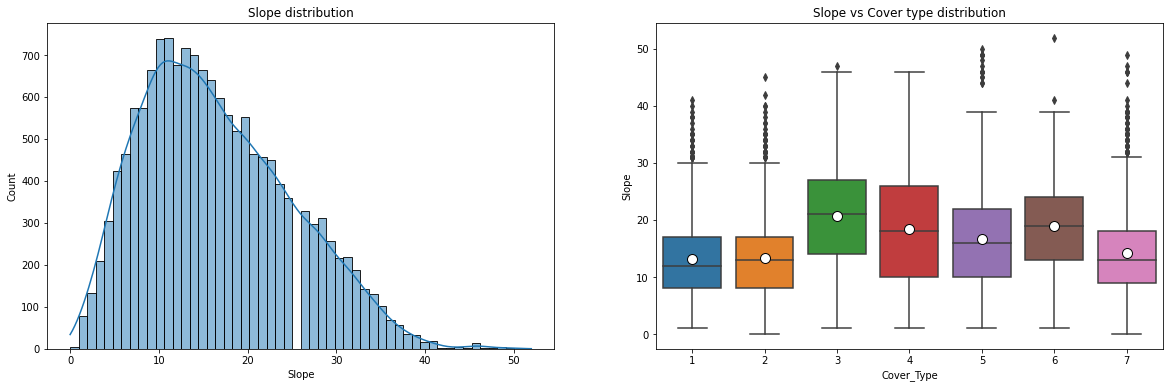

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
ax1.set_title("Slope distribution")
sns.histplot(x=X['Slope'], kde=True, ax=ax1)

ax2.set_title("Slope vs Cover type distribution")
sns.boxplot(ax=ax2, x=y, y=X['Slope'],showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.show()

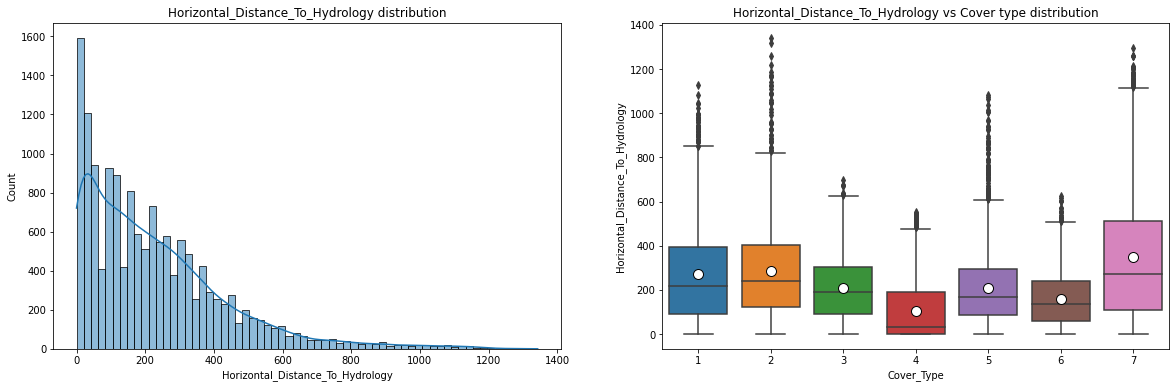

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
ax1.set_title("Horizontal_Distance_To_Hydrology distribution")
sns.histplot(x=X['Horizontal_Distance_To_Hydrology'], kde=True, ax=ax1)

ax2.set_title("Horizontal_Distance_To_Hydrology vs Cover type distribution")
sns.boxplot(ax=ax2, x=y, y=X['Horizontal_Distance_To_Hydrology'],showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.show()

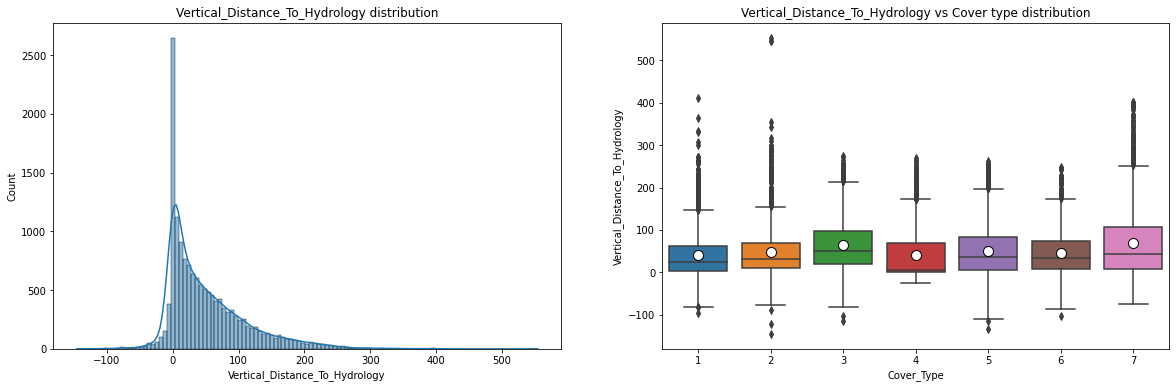

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
ax1.set_title("Vertical_Distance_To_Hydrology distribution")
sns.histplot(x=X['Vertical_Distance_To_Hydrology'], kde=True, ax=ax1)

ax2.set_title("Vertical_Distance_To_Hydrology vs Cover type distribution")
sns.boxplot(ax=ax2, x=y, y=X['Vertical_Distance_To_Hydrology'],showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.show()

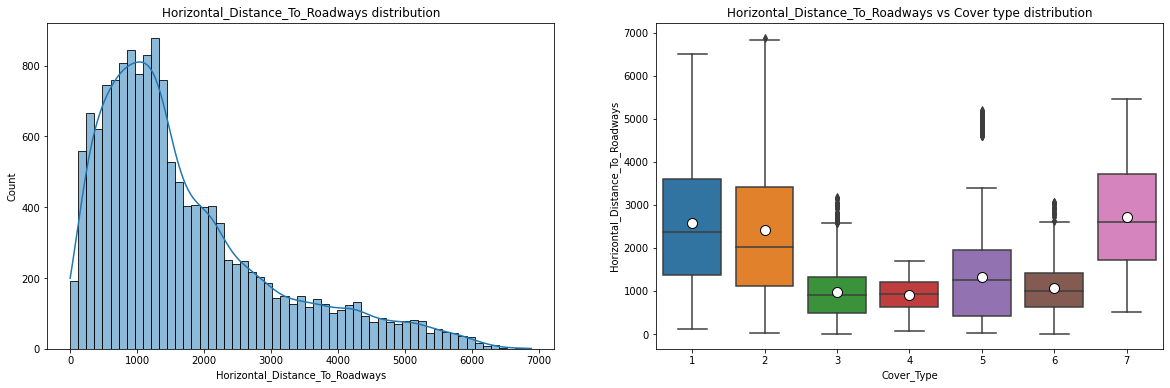

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
ax1.set_title("Horizontal_Distance_To_Roadways distribution")
sns.histplot(x=X['Horizontal_Distance_To_Roadways'], kde=True, ax=ax1)

ax2.set_title("Horizontal_Distance_To_Roadways vs Cover type distribution")
sns.boxplot(ax=ax2, x=y, y=X['Horizontal_Distance_To_Roadways'],showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.show()

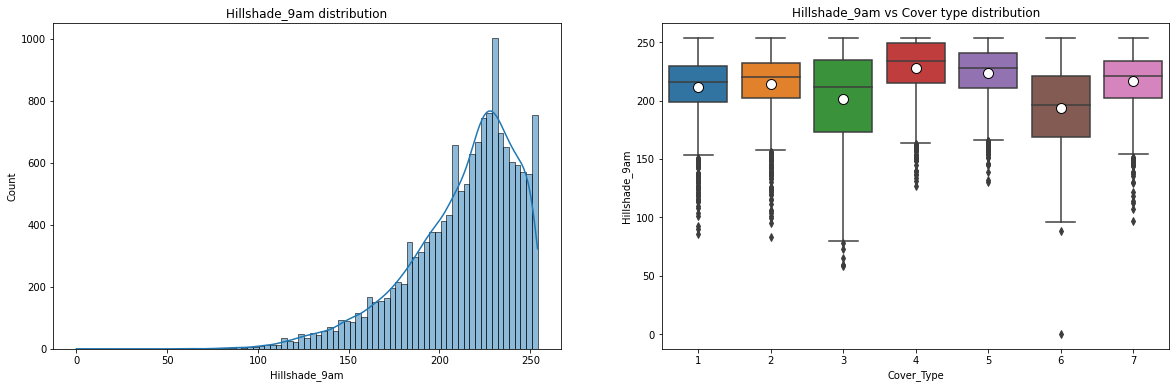

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
ax1.set_title("Hillshade_9am distribution")
sns.histplot(x=X['Hillshade_9am'], kde=True, ax=ax1)

ax2.set_title("Hillshade_9am vs Cover type distribution")
sns.boxplot(ax=ax2, x=y, y=X['Hillshade_9am'],showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.show()

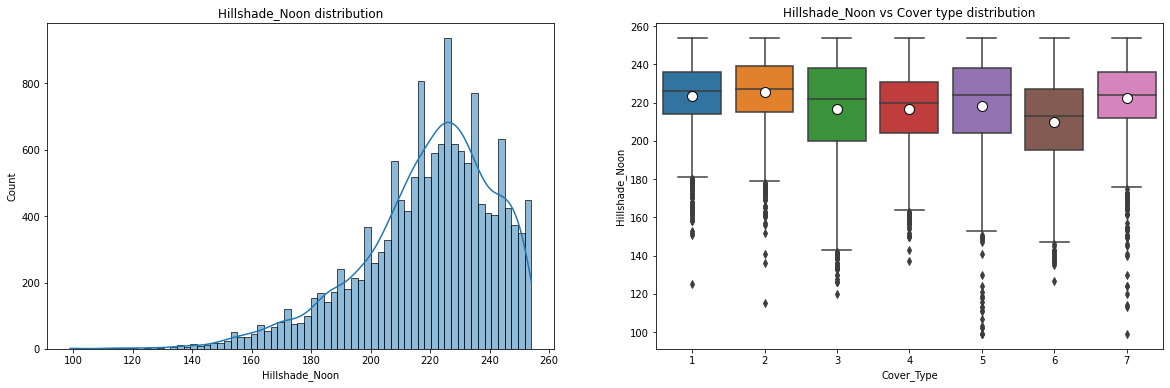

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
ax1.set_title("Hillshade_Noon distribution")
sns.histplot(x=X['Hillshade_Noon'], kde=True, ax=ax1)

ax2.set_title("Hillshade_Noon vs Cover type distribution")
sns.boxplot(ax=ax2, x=y, y=X['Hillshade_Noon'],showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.show()

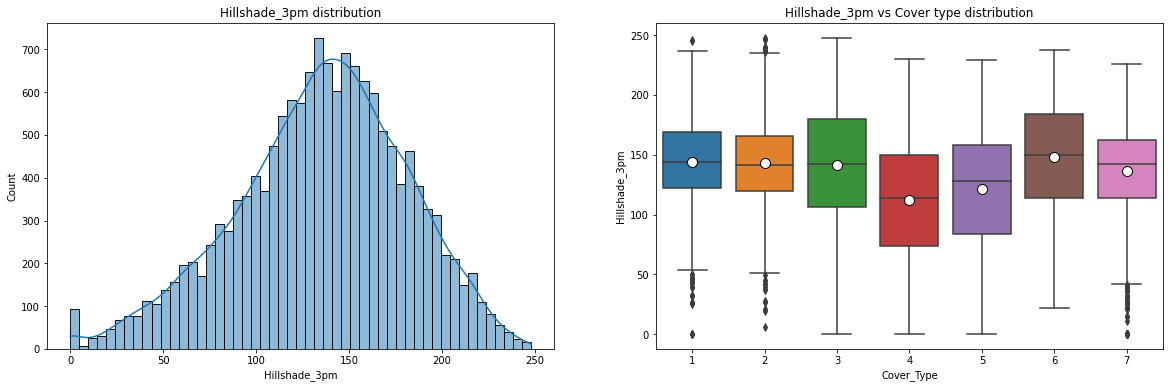

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
ax1.set_title("Hillshade_3pm distribution")
sns.histplot(x=X['Hillshade_3pm'], kde=True, ax=ax1)

ax2.set_title("Hillshade_3pm vs Cover type distribution")
sns.boxplot(ax=ax2, x=y, y=X['Hillshade_3pm'],showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.show()

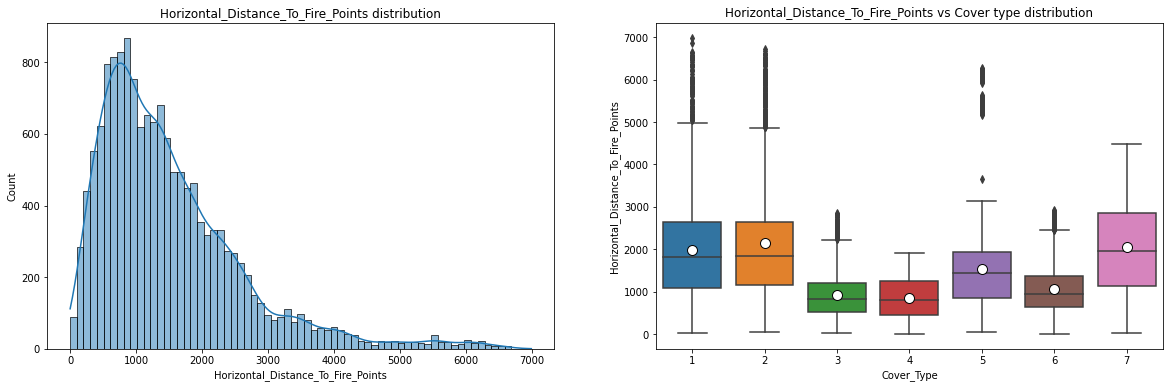

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
ax1.set_title("Horizontal_Distance_To_Fire_Points distribution")
sns.histplot(x=X['Horizontal_Distance_To_Fire_Points'], kde=True, ax=ax1)

ax2.set_title("Horizontal_Distance_To_Fire_Points vs Cover type distribution")
sns.boxplot(ax=ax2, x=y, y=X['Horizontal_Distance_To_Fire_Points'],showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.show()

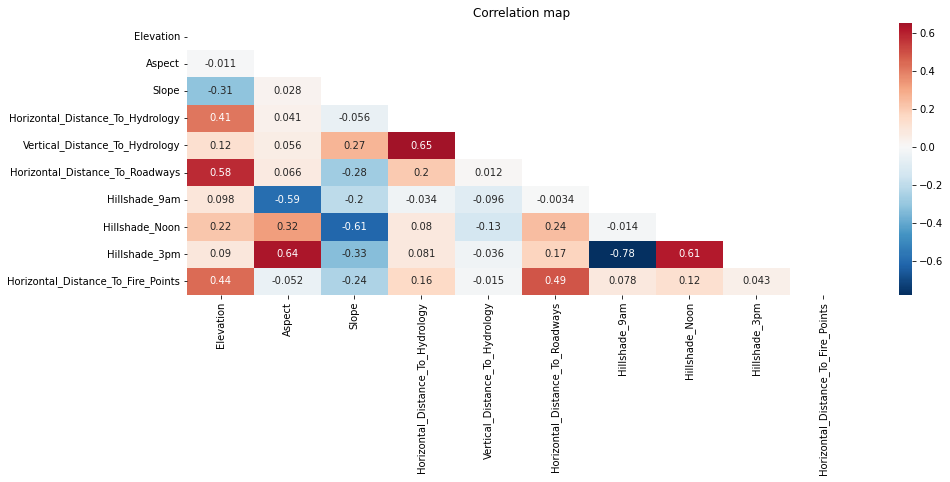

In [16]:
plt.figure(figsize=(15, 5))
mask = np.triu(np.ones_like(X.iloc[:, :10].corr()))
sns.heatmap(X.iloc[:, :10].corr(), cmap="RdBu_r", annot=True, center=0, mask=mask)
plt.title('Correlation map')
plt.show()

Let's examine relationships of distance variables and try to find some pattern in the data.

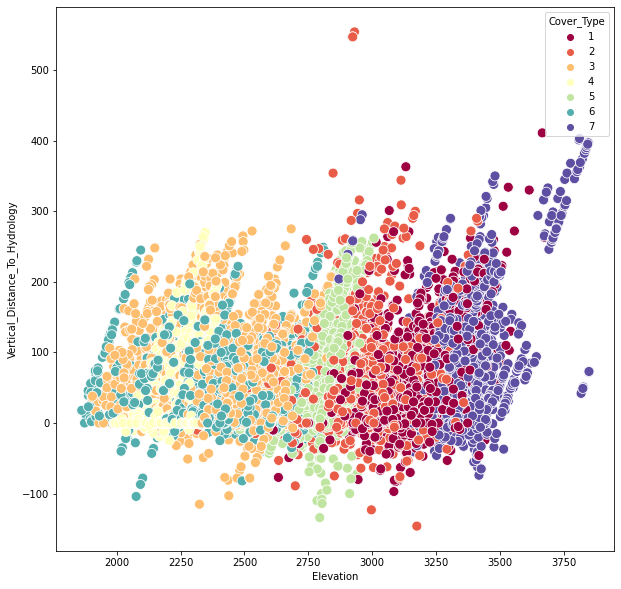

In [17]:
plt.figure(figsize=(10, 10))
plt.xlabel('Elevation')
plt.ylabel('Vertical_Distance_To_Hydrology')
sns.scatterplot(
    x=X['Elevation'],
    y=X['Vertical_Distance_To_Hydrology'],
    hue=y,
    palette='Spectral',
    s=100
)
plt.show()

The plot above shows an obvious pattern in the data. In each class, an increase growth in *Elevation* leads to an increase in *Vertical_Distance_To_Hydrology*. We can line up the relationship of these two variables by introducing a new variable.

In [18]:
X['EVDtH'] = X['Elevation'] - X['Vertical_Distance_To_Hydrology']

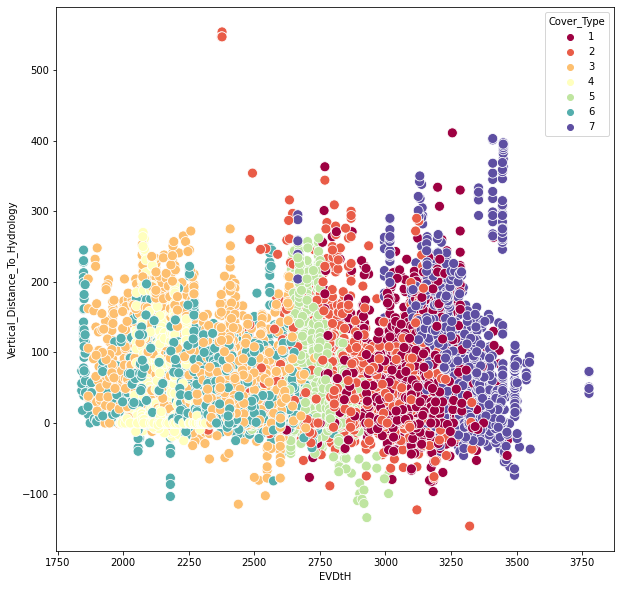

In [19]:
plt.figure(figsize=(10, 10))
plt.xlabel('EVDtH')
plt.ylabel('Vertical_Distance_To_Hydrology')
sns.scatterplot(
    x=X['EVDtH'],
    y=X['Vertical_Distance_To_Hydrology'],
    hue=y,
    palette='Spectral',
    s=100
)
plt.show()

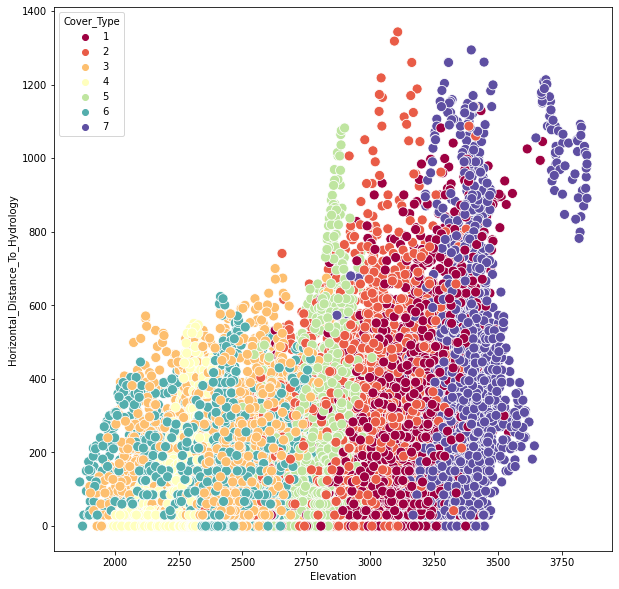

In [20]:
plt.figure(figsize=(10, 10))
plt.xlabel('Elevation')
plt.ylabel('Horizontal_Distance_To_Hydrology')
sns.scatterplot(
    x=X['Elevation'],
    y=X['Horizontal_Distance_To_Hydrology'],
    hue=y,
    palette='Spectral',
    s=100
)
plt.show()

We can observe a less pronounced, but still very similar pattern between *Elevation* and *Horizontal_Distance_To_Hydrology*. So we substract only a small fraction of the original variable.

In [21]:
X['EHDtH'] = X['Elevation'] - X['Horizontal_Distance_To_Hydrology']*0.15

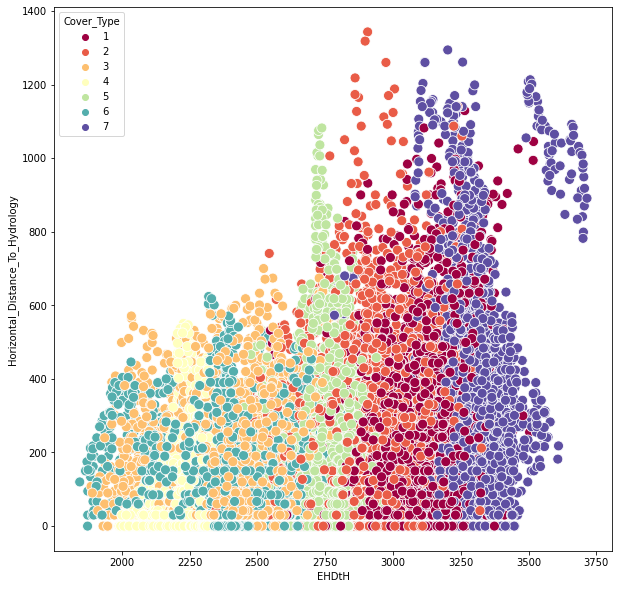

In [22]:
plt.figure(figsize=(10, 10))
plt.xlabel('EHDtH')
plt.ylabel('Horizontal_Distance_To_Hydrology')
sns.scatterplot(
    x=X['EHDtH'],
    y=X['Horizontal_Distance_To_Hydrology'],
    hue=y,
    palette='Spectral',
    s=100
)
plt.show()

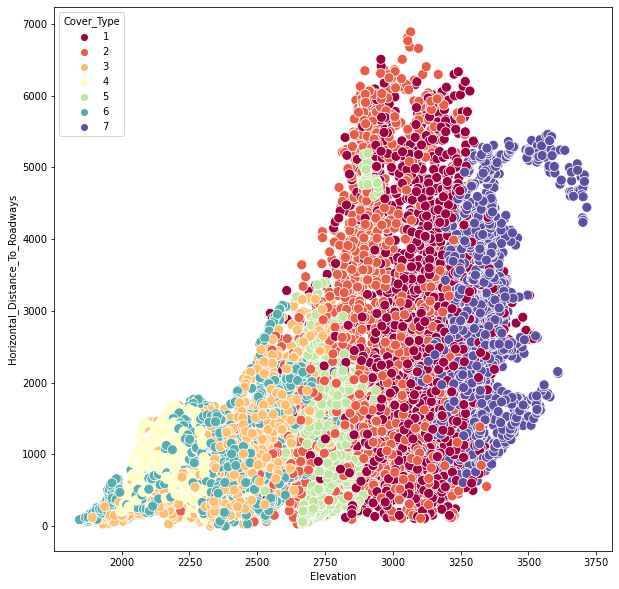

In [23]:
plt.figure(figsize=(10, 10))
plt.xlabel('Elevation')
plt.ylabel('Horizontal_Distance_To_Roadways')
sns.scatterplot(
    x=X['EHDtH'],
    y=X['Horizontal_Distance_To_Roadways'],
    hue=y,
    palette='Spectral',
    s=100
)
plt.show()

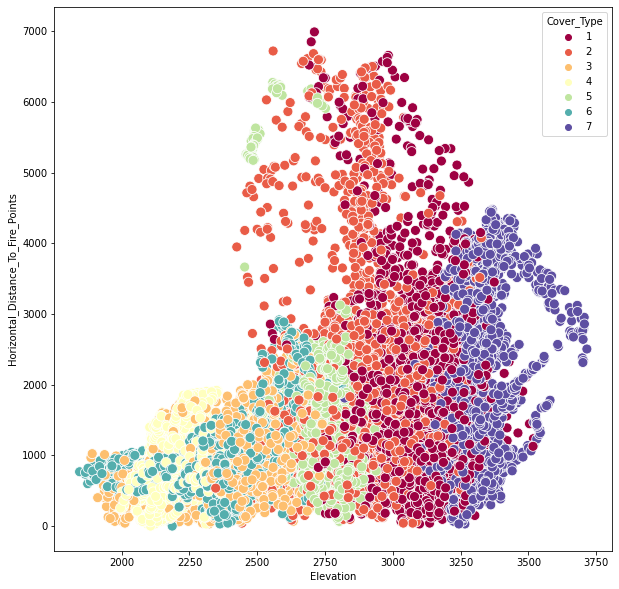

In [24]:
plt.figure(figsize=(10, 10))
plt.xlabel('Elevation')
plt.ylabel('Horizontal_Distance_To_Fire_Points')
sns.scatterplot(
    x=X['EHDtH'],
    y=X['Horizontal_Distance_To_Fire_Points'],
    hue=y,
    palette='Spectral',
    s=100
)
plt.show()

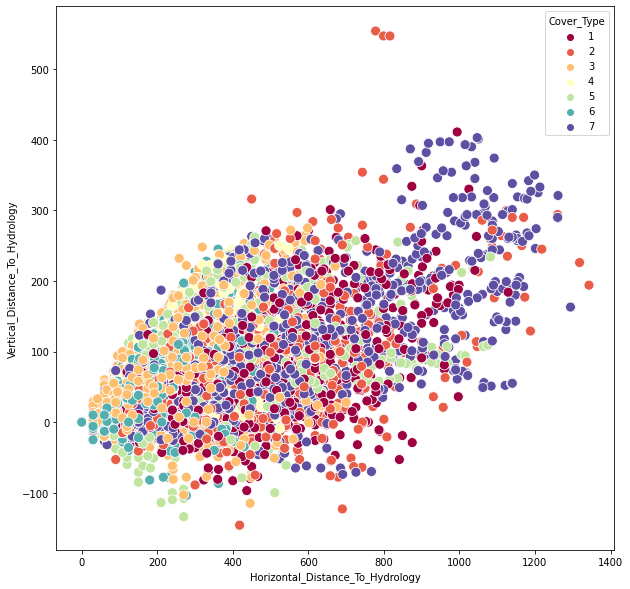

In [25]:
plt.figure(figsize=(10, 10))
plt.xlabel('Horizontal_Distance_To_Hydrology')
plt.ylabel('Vertical_Distance_To_Hydrology')
sns.scatterplot(
    x=X['Horizontal_Distance_To_Hydrology'],
    y=X['Vertical_Distance_To_Hydrology'],
    hue=y,
    palette='Spectral',
    s=100
)
plt.show()

Also, we can compute *Euclidian Distance to Hydrology (EDtH)*.

In [26]:
X['EDtH'] = np.sqrt(X['Horizontal_Distance_To_Hydrology']**2+X['Vertical_Distance_To_Hydrology']**2)

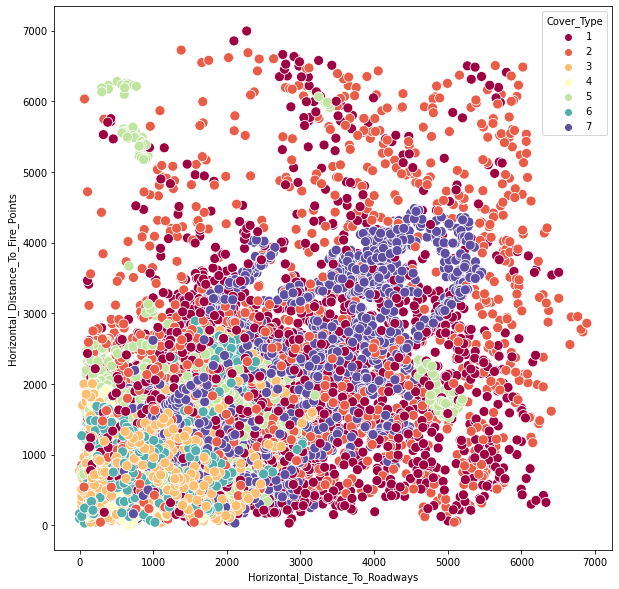

In [27]:
plt.figure(figsize=(10, 10))
plt.xlabel('Horizontal_Distance_To_Roadways')
plt.ylabel('Horizontal_Distance_To_Fire_Points')
sns.scatterplot(
    x=X['Horizontal_Distance_To_Roadways'],
    y=X['Horizontal_Distance_To_Fire_Points'],
    hue=y,
    palette='Spectral',
    s=100
)
plt.show()

We can create more linear combinations of distance features and see later if they are usefull.

In [28]:
X['Hydro_Fire_1'] = X['Horizontal_Distance_To_Hydrology'] + X['Horizontal_Distance_To_Fire_Points']
X['Hydro_Fire_2'] = abs(X['Horizontal_Distance_To_Hydrology'] - X['Horizontal_Distance_To_Fire_Points'])
X['Hydro_Road_1'] = abs(X['Horizontal_Distance_To_Hydrology'] + X['Horizontal_Distance_To_Roadways'])
X['Hydro_Road_2'] = abs(X['Horizontal_Distance_To_Hydrology'] - X['Horizontal_Distance_To_Roadways'])
X['Fire_Road_1'] = abs(X['Horizontal_Distance_To_Fire_Points'] + X['Horizontal_Distance_To_Roadways'])
X['Fire_Road_2'] = abs(X['Horizontal_Distance_To_Fire_Points'] - X['Horizontal_Distance_To_Roadways'])

Now, let's plot Hillshade features relationships.

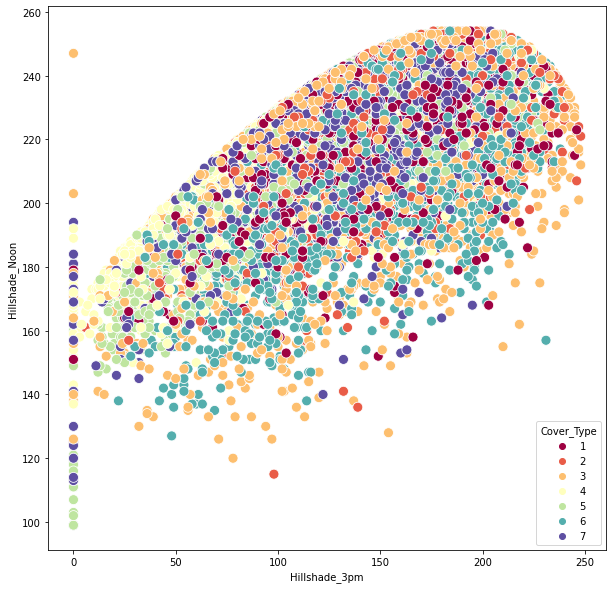

In [29]:
plt.figure(figsize=(10, 10))
plt.xlabel('Hillshade_3pm')
plt.ylabel('Hillshade_Noon')
sns.scatterplot(
    x=X['Hillshade_3pm'],
    y=X['Hillshade_Noon'],
    hue=y,
    palette='Spectral',
    s=100
)
plt.show()

Seems like some data of the *Hillshade_3pm* feature is missing. Let's impute these values using RandomForestRegressor. 

In [30]:
missing_values_X_test = X[X['Hillshade_3pm'] == 0].copy()
missing_values_X_test.drop('Hillshade_3pm', axis=1, inplace=True)

In [32]:
missing_values_X_train = X.drop(missing_values_X_test.index)
missing_values_y_train = missing_values_X_train['Hillshade_3pm']
missing_values_X_train.drop('Hillshade_3pm', axis=1, inplace=True)

In [33]:
imputer = RandomForestRegressor(n_estimators=700, max_depth=None, min_samples_split=2)
imputer.fit(missing_values_X_train, missing_values_y_train)
values_for_imputation = [int(x) for x in imputer.predict(missing_values_X_test)]

In [34]:
X.loc[X['Hillshade_3pm'] == 0, 'Hillshade_3pm'] = values_for_imputation

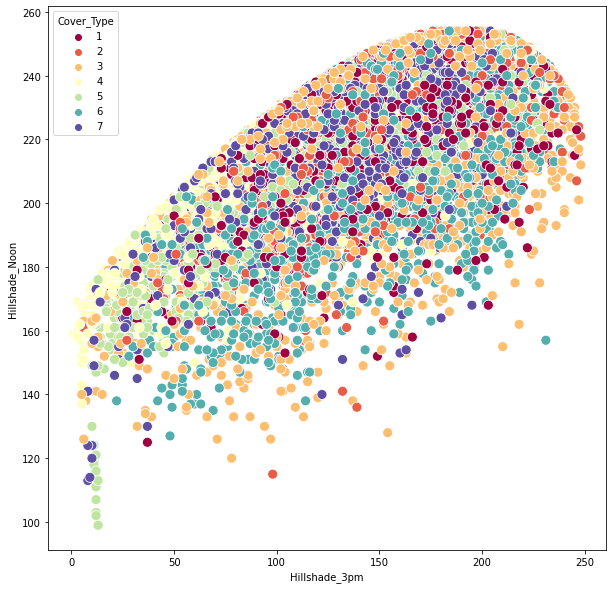

In [35]:
plt.figure(figsize=(10, 10))
plt.xlabel('Hillshade_3pm')
plt.ylabel('Hillshade_Noon')
sns.scatterplot(
    x=X['Hillshade_3pm'],
    y=X['Hillshade_Noon'],
    hue=y,
    palette='Spectral',
    s=100
)
plt.show()

In [36]:
clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=1)
clf.fit(X, y)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=1)

In [65]:
pd.DataFrame(index=clf.feature_names_in_, data=clf.feature_importances_).sort_values(by=0, ascending=False).head(10)

,0
EHDtH,0.120304
EVDtH,0.115187
Elevation,0.109540
Fire_Road_1,0.044898
Horizontal_Distance_To_Roadways,0.039327
Hydro_Road_2,0.038832
Hydro_Road_1,0.037342
EDtH,0.033127
Hydro_Fire_1,0.032375
Hillshade_9am,0.031811


We can see that most of the new features are very usefull.